In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

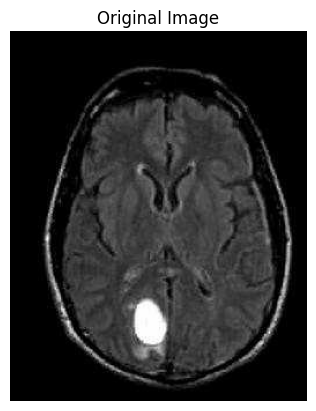

In [6]:
from PIL import Image

# If it's a local file path, use this:
img = Image.open('/content/photo_2024-11-29_18-01-45.jpg')

img = np.array(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

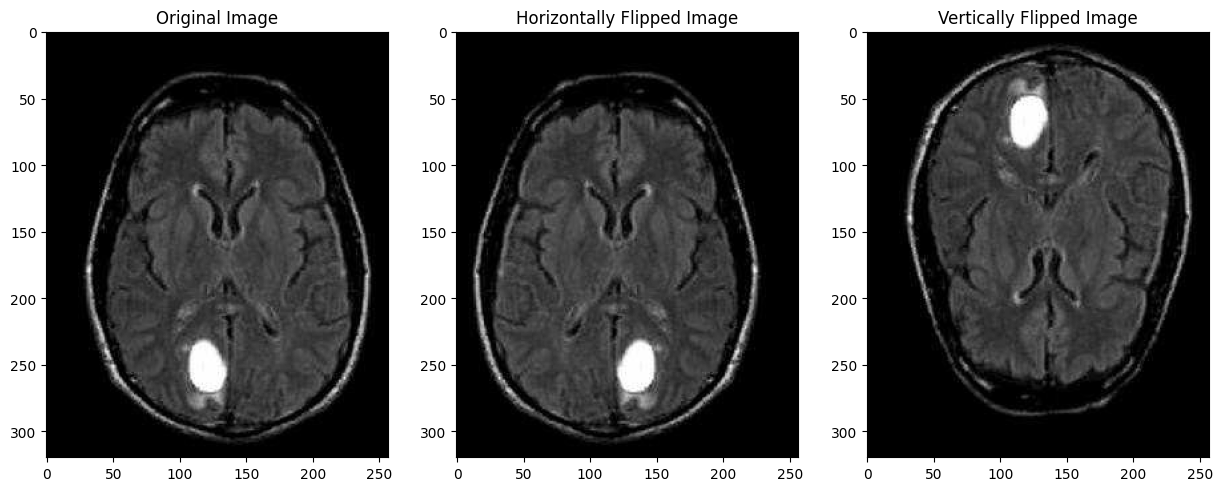

In [8]:
# Horizontal flip
flipped_image_h = cv2.flip(img, 1)
# Vertical flip
flipped_image_v = cv2.flip(img, 0)

# Display input and output images side by side
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Horizontally Flipped Image')
plt.imshow(flipped_image_h, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Vertically Flipped Image')
plt.imshow(flipped_image_v, cmap='gray')
plt.show()

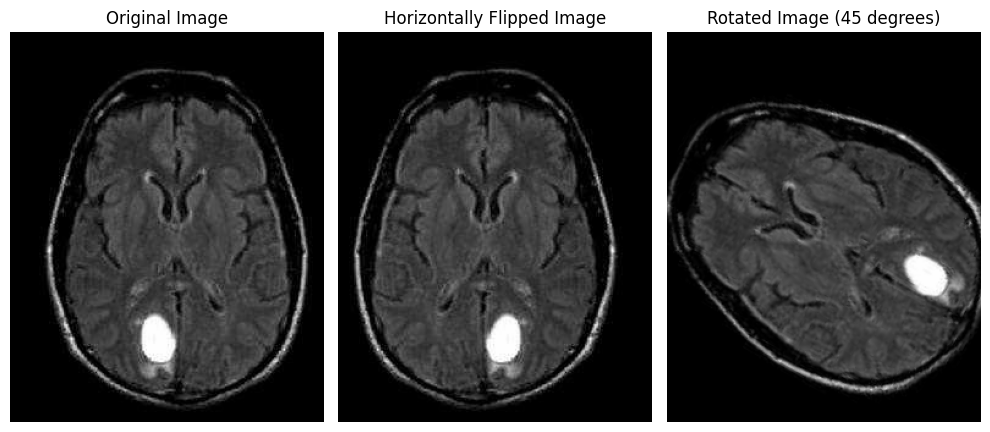

In [9]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, matrix, (w, h))
    return rotated_image
# Rotate the image by 45 degrees
rotated_img = rotate_image(flipped_image_h, 60)

# Plot the original and rotated images
plt.figure(figsize=(10, 5))  # Adjust figure size

# Original image
plt.subplot(1, 3, 1)  # 1 row, 2 columns, position 1
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Horizontally Flipped image
plt.subplot(1, 3, 2)  # 1 row, 2 columns, position 1
plt.imshow(cv2.cvtColor(flipped_image_h, cv2.COLOR_BGR2RGB))
plt.title('Horizontally Flipped Image')
plt.axis('off')

# Rotated image
plt.subplot(1, 3, 3)  # 1 row, 2 columns, position 2
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45 degrees)')
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()


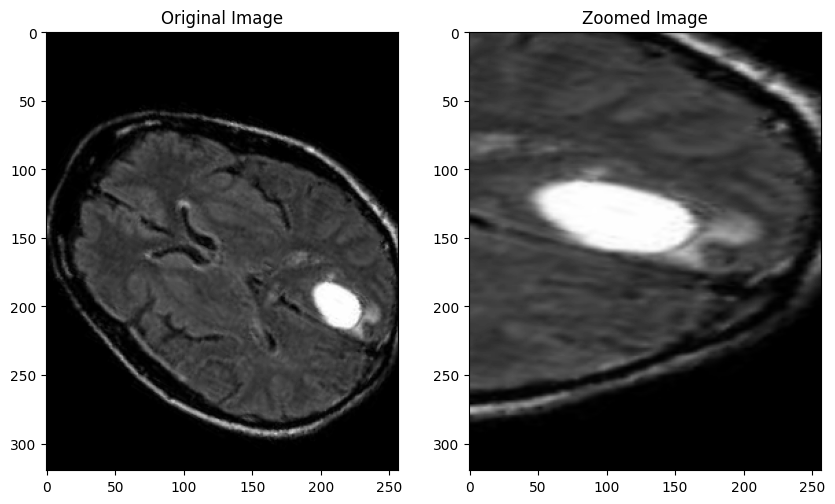

In [12]:
def zoom_image(image, zoom_factor):
    height, width = image.shape[:2]
    # Calculate cropping coordinates
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    top = (height - new_height)//2
    left = (width - new_width)

    # Crop and resize the image
    cropped_image = image[top:height, left:width]
    zoomed_image = cv2.resize(cropped_image, (width, height), interpolation=cv2.INTER_LINEAR)
    return zoomed_image
zoom_factor=0.3
zoomed_image = zoom_image(rotated_img, zoom_factor)

# Display input and output images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(rotated_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Zoomed Image')
plt.imshow(zoomed_image, cmap='gray')
plt.show()
